* **1. 介绍**
* **2. 数据准备**
    * 2.1 Load data
    * 2.2 Check for null and missing values
    * 2.3 Normalization
    * 2.4 Reshape
    * 2.5 Label encoding
    * 2.6 Split training and valdiation set
* **3. CNN**

* **4. 评估模型**

* **5. 预测和提交**


# 1. Introduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # 转换为 one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framewo

# 2. Data preparation
## 2.1 Load data

In [3]:
# 利用pandas的read_csv函数，读取我们的train 和 test数据集合
train = pd.read_csv("data/subset_train.csv")
test = pd.read_csv("data/Small_test.csv")
#train validation test(完全独立的，与训练过程无关的)

3    227
7    220
2    220
1    218
6    214
9    209
4    209
5    201
0    199
8    183
Name: label, dtype: int64

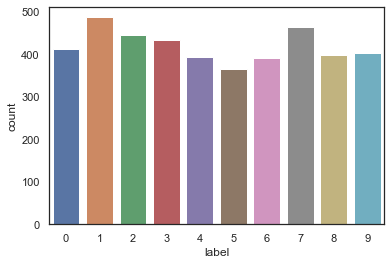

In [4]:
#利用pandas的header选择，将label列传递给Y_train 
Y_train = train["label"]
Y_test = test['label']
# 因为train.csv中，第一列label在上述代码已经传递给Y_label，这里对于x_train 我们不需要训练集的第一列 
X_train = train.drop(labels = ["label"],axis = 1) 
X_test = test.drop(labels = ["label"],axis = 1)
# 释放内存
del train 
g = sns.countplot(Y_train)

Y_train.value_counts()
Y_train
Y_test.value_counts()


## 我们对10位数字有相似的计数

## 2.2 Check for null and missing values

In [5]:
# 检查训练数据是否有空值
X_train.isnull().any().describe() 

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
# 检查训练数据是否有空值 
X_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

I check for corrupted images (missing values inside).

There is no missing values in the train and test dataset. So we can safely go ahead.

## 2.3 Normalization

We perform a grayscale normalization to reduce the effect of illumination's differences. 

Moreover the CNN converg faster on [0..1] data than on [0..255].
标准化，将灰度值 0-255 映射到0 - 1区间

In [5]:
# 归一化数据
X_train = X_train / 255.0 #标准化测试集合 

X_test = X_test / 255.0

## 2.3 Reshape

In [6]:
#  利用 reshape 函数， 将X_train变换成 (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1) 


Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices. 

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices. 

## 2.5 Label encoding

In [7]:
# 利用0 1编码 将0-9数字标签编码成10维向量 (ex : 9 -> [0,0,0,0,0,0,0,0,0,1])
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)
print(Y_train)
## one-hot encoding

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

## 2.6 Split training and valdiation set 

In [65]:
# 设置随机 seed
random_seed = 2

In [66]:

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)# 将训练集合按照9:1 分成训练集合 和验证集合 validation 10折交叉验证 10-fold validation  

通过可视化图像并查看标签，我们可以更好地理解这些示例之一。

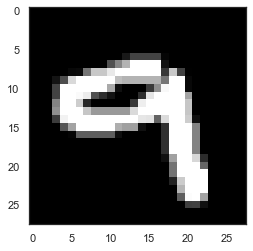

In [67]:
# Some examples #x-train里面第一个sample的 0:最大 0:最大 0 [:,:,0] 
g = plt.imshow(X_train[0][:,:,0],cmap='gray') #plt为什么把灰度可以生

# 3. CNN
## 3.1 Define the model

In [68]:
batch_size = 40
num_classes = 10
epochs = 25

input_shape = (28,28,1)


model = Sequential()#构建CNN 模型 这里我们利用Sequential 序列累加
# 第一个 卷积层 32个kernel kernel大小3*3 输出的激活函数relu kernel利用 He-正态分布 生成
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
#第二个 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
### 构建一个最大池化层 
model.add(MaxPool2D((2, 2),strides=2))
#随机删除一些神经元
model.add(Dropout(0.20))
###  在下述卷积层内 构建一个padding, 在之后构建一个kernel size = 2 *2 的池化层 
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
###  构建一个全联接 其中包含128个神经元 并使用relu激活函数
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.25))

### 全连接有10个特征输出，10个神经元选择多分类函数'softmax'
model.add(Dense(num_classes, activation='softmax'))
X_train.shape

(3780, 28, 28, 1)

In [69]:
### 运行model.summary（）模型的架构 ####
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 64)          0         
__________

In [86]:
#优化器  尝试使用不同的优化器 至少以下三种 
## 中文参考 https://keras.io/zh/optimizers/
# SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
optimizer =RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0) 
# Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer = RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
### 将模型compile 编译
### 调节loss 参数，即loss function
### mean_squared_error
### categorical_crossentropy/为什么不用binary_crossentropy
### mean_absolute_error 
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
### training 过程中的 自动调节函数
### Reduce LR On Plateau = 减少学习率，当某一个参数达到一个平台期 自动的 把上面优化器中的 lr 减小

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [87]:
history = model.fit(X_train,Y_train, batch_size=batch_size,epochs = epochs, validation_data = (X_val,Y_val),callbacks=[learning_rate_reduction])



Train on 3780 samples, validate on 420 samples
Epoch 1/25
3780/3780 [==============================] - 5s 1ms/step - loss: 0.0140 - acc: 0.9947 - val_loss: 0.1263 - val_acc: 0.9738
Epoch 2/25
3780/3780 [==============================] - 4s 932us/step - loss: 0.0061 - acc: 0.9984 - val_loss: 0.1279 - val_acc: 0.9714
Epoch 3/25
3780/3780 [==============================] - 3s 922us/step - loss: 0.0049 - acc: 0.9984 - val_loss: 0.0979 - val_acc: 0.9810
Epoch 4/25
3780/3780 [==============================] - 4s 951us/step - loss: 0.0112 - acc: 0.9968 - val_loss: 0.1135 - val_acc: 0.9786
Epoch 5/25
3780/3780 [==============================] - 3s 924us/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.0958 - val_acc: 0.9786
Epoch 6/25
3780/3780 [==============================] - 4s 935us/step - loss: 0.0074 - acc: 0.9976 - val_loss: 0.1224 - val_acc: 0.9786

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/25
3780/3780 [==============================] - 3s

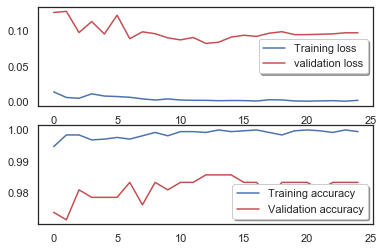

In [88]:
# 提示 从epoch>优化器>损失函数>学习率>dropout有无 依次调试 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

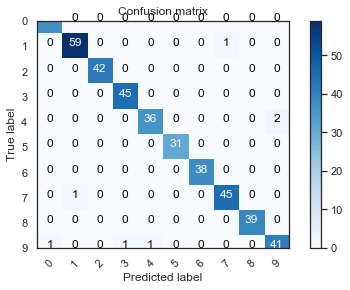

In [89]:
# 生成10标签混淆矩阵

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    此函数打印并绘制混淆矩阵。
    归一化可以通过设置 `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 从验证数据集中预测值
Y_pred = model.predict(X_val)
# 将预测类别转换为one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
#将预测类别转换为 one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
#计算混淆矩阵
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# 绘制混淆矩阵
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

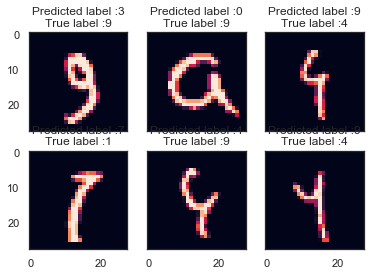

In [91]:
### 打印出认错的数字

errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ 此功能显示6张带有其预测标签和真实标签的图像"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# 错误的预测数字的概率
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# 错误集中真实值的预测概率
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

#预测标签与真实标签的概率之间的差异
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# 增量概率错误的排序列表
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# 前6个错误
most_important_errors = sorted_dela_errors[-9:]

# 画出
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
#optional 画出roc
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.predict(X_test)
for i in range(num_classes):
     fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], y_score[:,i]) #
    # 曲线下的AUC面积
     roc_auc[i] = auc(fpr[i], tpr[i])
#y_pred_keras = model.predict(X_test).ravel()
##fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)
#y_pred_keras

In [ ]:
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from keras.utils import plot_model
import pydot_ng as pydot
pydot_model(model, to_file='model.png', show_shapes=True)